This Python notebook shows a simple exmaple of using Genetic Algorithm (GA) to determine the root of a one-dimensional function. The purpose is to demonstrate the basic workflow of GA, and therefore the solver is not fine-tuned.

In [1]:
# import necessary libraries/packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## Problem statement

We are going to implement Genetic Algorithm (GA) to find the roots of a given function $f(x) = \cos(x) - 0.25x$ , where $x$ is in the range of 1 and 3.

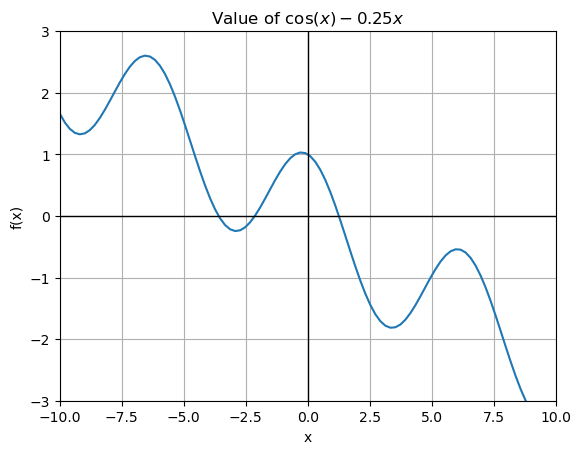

In [2]:
# First we define the function
def f(x):
  return np.cos(x) - 0.25 * x

# We generate values for x
x = np.linspace(-10, 10, 100)

# Next, we compute the corresponding values
y = f(x)

# Then we create the plot
plt.plot(x,y)
plt.axhline(0, color='black', linewidth = 1)
plt.axvline(0, color='black', linewidth = 1)
plt.grid(True)

# Finally we add labels and title
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Value of $\cos(x) - 0.25x$')
plt.xlim([-10,10])
plt.ylim([-3,3])

plt.show()


In order to solver the problem with GA, we need to first tranfer the problem to maximization or minimization by manipulating the function.   For this case, the maximization problem can be formulated as $\arg \max_{x}(-|\cos(x) - 0.25 x|)$, $x \in [1,3]$.

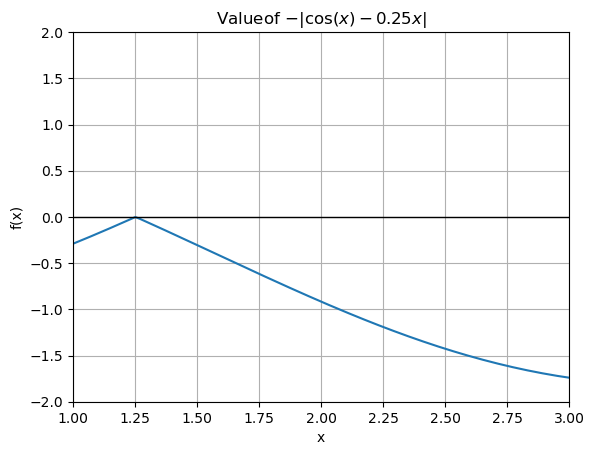

In [3]:
# First we define the function
def f(x):
  return -np.abs(np.cos(x) - 0.25 * x)

# We generate values for x
x = np.linspace(-10, 10, 1000)

# Next, we compute the corresponding values
y = f(x)

# Then we create the plot
plt.plot(x,y)
plt.axhline(0, color='black', linewidth = 1)
plt.axvline(0, color='black', linewidth = 1)
plt.grid(True)

# Finally we add labels and title
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Valueof $-|\cos(x) - 0.25x|$')
plt.xlim([1,3])
plt.ylim([-2,2])

plt.show()

Therefore, our fitness function for this problem would be:

$J(x) = -|\cos(x) - 0.25 x|$ , $x \in [1,3]$.

We can see that the higher the fitness function values is, the closer we get to the root ($x = 1.02987$) of the original function.

# GA components
We are going to use GA to find the maximum fitness value for $\max(-|\cos(x) - 0.25 x|)$, where $x$ $ϵ$ $[1,3]$. For the root in question, this value should be close to zero.

In [4]:
def func(x):
    return -np.abs(np.cos(x) - 0.25 * x)

## Initialize Population

The algorithm starts by creating an initial population of potential solutions to the problem. Each solution is represented as a set of parameters called chromosomes or individuals. The population size is determined in advance. This initial population will later enter the GA loop. We will not initialize random values in decimal numbers ($x \in X$) but instead for a binary representation $s \in S$.

In [5]:
def init(m, n):
    return np.random.randint(2, size=(m,n))

## Decoder

This decoder converts the binary representation of the chromosomes into decimal numbers in a range $[a,b]$

In [6]:
def decode(ss, a, b):
    n = ss.shape[1]
    x = []
    for s in ss:
        bin_to_int = np.array([int(j) << i for i,j in enumerate(s[::-1])]).sum()
        int_to_x = a + bin_to_int * (b - a) / (2**n - 1)
        x.append(int_to_x)
    return np.array(x)

## Selection

We are going to use Tournament Selection scheme to choose individuals to pass their genes to the next generation. For this purpose, we need to define the size of the tournament. In this case, we are chosing that only 20% participates of the entire population participates in the tournament.

In [7]:
def selection(pop, sample_size, fitness):
    m,n = pop.shape
    new_pop = pop.copy()

    for i in range(m):
        rand_id = np.random.choice(m, size=max(1, int(sample_size*m)), replace=False)
        max_id = rand_id[fitness[rand_id].argmax()]
        new_pop[i] = pop[max_id].copy()

    return new_pop

## Crossover

Crossover retrieves the data from two parents and combine their information into two offsprings with inherited properties from the parents.

In [8]:
def crossover(pop, pc):
    m,n = pop.shape
    new_pop = pop.copy()

    for i in range(0, m-1, 2):
        if np.random.uniform(0, 1) < pc:
            pos = np.random.randint(0, n-1)
            new_pop[i, pos+1:] = pop[i+1, pos+1:].copy()
            new_pop[i+1, pos+1:] = pop[i, pos+1:].copy()

    return new_pop

## Mutation

Mutation acts on the chromosomes by randomly altering or modifying their genes. The purpose is to introduce new variations into the population that were not present in the initial generation. By introducing random changes, mutation helps to explore different regions of the search space that may contain potential solutions.

In [9]:
def mutation(pop, pm):
    m,n = pop.shape
    new_pop = pop.copy()
    mutation_prob = (np.random.uniform(0, 1, size=(m,n)) < pm).astype(int)
    return (mutation_prob + new_pop) % 2

# Putting everything together
Before jumping into the algorithm, let's create a python function print_result to display the population, fitness, and average fitness for the first and last generations. It also displays the best fitness as well as point x where the best fitness is achieved.

In [10]:
def print_result(gen_num, pop, fitness, x):
    m = pop.shape[0]
    print('=' * 68)
    print(f'Generation {gen_num} max fitness {fitness.max():0.4f} at x = {x[fitness.argmax()]:0.4f}')

    for i in range(m):
        print(f'# {i+1}\t{pop[i]}   fitness: {fitness[i]:0.4f}')

    print(f'Average fitness: {fitness.mean():0.4f}')
    print('=' * 68, '\n')

The GA is built on top of the functions we've created so far. Roughly, here is the algorithm:

Initialize a random population
While the stopping criterion is not met, do:
- Selection
- Crossover
- Mutation
- Decode population

We also need to define the parameters to be used in GA.
- max_iter -> maximum number of iterations allowed
- eps -> acceptable error
- ps -> probability of selection
- pc -> probability of crossover
- pm -> probability of mutation

    

In [ ]:
def GeneticAlgorithm(func, pop_size, str_size, low, high,
                     ps=0.2, pc=1.0, pm=0.1, max_iter=1000, eps=1e-4, random_state=None):

    np.random.seed(random_state)
    pop = init(pop_size, str_size)
    print(pop)
    x = decode(pop, low, high)
    fitness = func(x)
    best = [fitness.max()]
    print_result(1, pop, fitness, x)

    i = 0
    while i < max_iter and abs(best[-1]) > eps:
        pop = selection(pop, ps, fitness)
        print(pop)
        pop = crossover(pop, pc)
        pop = mutation(pop, pm)
        x = decode(pop, low, high)
        fitness = func(x)
        best.append(fitness.max())
        i += 1

    print_result(i, pop, fitness, x)

    if i == max_iter:
        print(i, 'maximum iteration reached!')
        print('Solution not found. Try increasing max_iter for better result.')
    else:
        print('Solution found at iteration', i)

    return fitness, x, best, i, pop_size

Define a function to plot search results.

In [12]:
def plot_result(func, fs, xs, best, i, m):
    xval = np.arange(1, 3, 0.01)
    yval = func(xval)
    plt.figure(figsize=(10,5))

    plt.subplot(121)
    plt.plot(xval, yval, color='m')
    plt.scatter(xs, fs, alpha=0.50)
    plt.xlim((1,3))
    plt.xlabel('$x$')
    plt.ylabel('$f(x) = -|cos(x) - 0.25x|$')
    plt.title('Population at Iteration ' + str(i) + '\n' + \
              'Number of Individuals: ' + str(m))
    plt.axhline(0, color='black', linewidth = 1)
    plt.axvline(0, color='black', linewidth = 1)
    plt.grid(True)

    plt.subplot(122)
    plt.plot(best, color='c')
    plt.xlim(0)
    plt.xlabel('Iteration')
    plt.ylabel('Best Fitness')
    plt.title('Best Fitness vs Iteration' + '\n' + \
              'Number of Individuals: ' + str(m))
    plt.axhline(0, color='black', linewidth = 1.0)
    plt.grid(True)
    # Set x-axis ticks to integers
    plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

    plt.tight_layout()
    plt.show()

# Results

Execute the code and print the results.

Generation 1 max fitness -0.1489 at x = 1.3747
# 1	[0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1]   fitness: -0.8180
# 2	[1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0]   fitness: -1.5441
# 3	[1 1 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1]   fitness: -1.5342
# 4	[1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1]   fitness: -1.2735
# 5	[1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1]   fitness: -1.6344
# 6	[1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0]   fitness: -1.6789
# 7	[0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0]   fitness: -0.5028
# 8	[0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1]   fitness: -0.3986
# 9	[0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1]   fitness: -0.5567
# 10	[0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0]   fitness: -0.2821
# 11	[0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0]   fitness: -0.5603
# 12	[0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0]   fitness: -0.1489
# 13	[0 1 0 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0]   fitness: -0.5998
# 14	[1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0]   fitness: -1.5912
# 15	[0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 

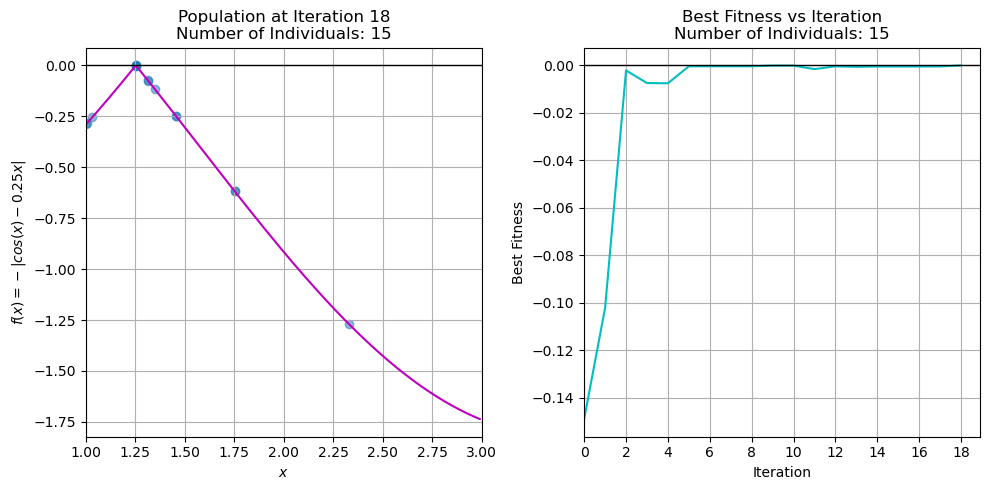

In [13]:
fs, xs, best, i, m = GeneticAlgorithm(func, pop_size=15, str_size=20, low=1, high=3, random_state=69)
plot_result(func, fs, xs, best, i, m)